# Database 

https://archive.ics.uci.edu/ml/datasets/Covertype

In [1]:
# Import funct
from aux import *
seed = 2020

Firsly, the dataset is read using Pandas. The file is supposed to be located in ```../dataset/```.

In [2]:
# Leemos la base de datos
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
for i in range(1,5):
    col_names.append('Wilderness_Area_' + str(i))
for i in range(1,41):
    col_names.append('Soil_Type_' + str(i))
col_names.append('Cover_Type')
# Leemos el dataset
dataset = pd.read_csv('../dataset/covtype.data', header=None, names=col_names)

Display the first 5 rows of the dataset.

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


We separate the diagnosys column and drop the identifier (not a .

In [4]:
X = dataset.drop('Cover_Type', axis=1).sample(frac=1, random_state=seed)
y = dataset['Cover_Type'].sample(frac=1, random_state=seed)
X, _, y, _ = train_test_split(X, y, train_size=15000, stratify=y, random_state=seed)

We shown the number of Benign and Malign samples.

In [5]:
y.value_counts()

2    7314
1    5469
3     923
7     530
6     448
5     245
4      71
Name: Cover_Type, dtype: int64

# Constants

In [6]:
# Hidden space dimensionality
hidden_space_dim = 2
# Ammount of samples
n_samples = X.shape[0]
# Observed space dimensionality
observed_space_dim = X.shape[1]
# Hidden layer dimension for Non-linear PCA and VAE
hidden_layer_dim = 100
# Training epochs
num_epochs = 4000
# Learning rate for Adam optimizer
learning_rate = 0.01

# Probabilistic PCA

In [7]:
# create an instance of the P model and the Q model
pca_model = pca(hidden_space_dim, observed_space_dim)
pca_q = Q_pca(hidden_space_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_pca = inf.inference.VI(pca_q, optimizer=optimizer, epochs=num_epochs)

We fit the model using the dataset ```X```.

In [8]:
pca_model.fit({"x": X}, VI_pca)        


 0 epochs	 168966127616.0....................
 200 epochs	 167675150336.0....................
 400 epochs	 158883561472.0....................
 600 epochs	 150055550976.0....................
 800 epochs	 136264343552.0....................
 1000 epochs	 122974019584.0....................
 1200 epochs	 105293905920.0....................
 1400 epochs	 92760457216.0....................
 1600 epochs	 76396748800.0....................
 1800 epochs	 63612387328.0....................
 2000 epochs	 53639757824.0....................
 2200 epochs	 45722517504.0....................
 2400 epochs	 37707505664.0....................
 2600 epochs	 33715896320.0....................
 2800 epochs	 29177206784.0....................
 3000 epochs	 26622210048.0....................
 3200 epochs	 24705075200.0....................
 3400 epochs	 23294230528.0....................
 3600 epochs	 22367823872.0....................
 3800 epochs	 21086513152.0....................

The evolution of the loss function over the training is:

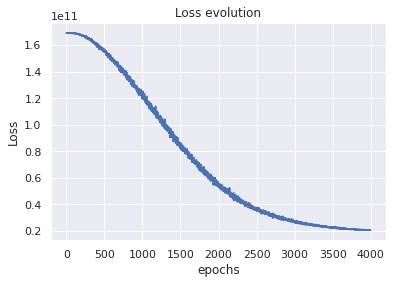

In [9]:
print_loss_function(VI_pca)

We plot the posterior using the learned model and the data.

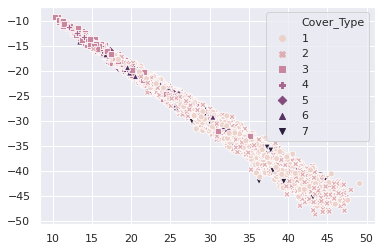

In [10]:
z = pca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

We can obtain the transformation by taking the mean values of ```w``` and ```w0```.

In [11]:
post = pca_model.posterior("w").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [[ 4.2133625e+01  2.6111360e+00  2.4420780e-01  4.3854547e+00
   1.2140347e+00  3.9200066e+01  3.4076960e+00  3.5505910e+00
   2.4174523e+00  3.3208603e+01 -2.4660286e-03 -4.8887730e-03
   4.8706122e-03 -6.6937539e-03 -6.3591837e-03 -7.0937886e-03
  -1.1336245e-02 -4.3309378e-03 -5.1404699e-03 -7.1005397e-03
  -6.8230126e-03 -4.3621724e-03 -9.5662391e-03 -5.3506242e-03
  -2.4821183e-03 -6.4910334e-03 -3.5088975e-03 -3.9783842e-03
   2.6583322e-04 -7.5243679e-03 -1.9558966e-03  6.6497465e-05
  -9.7599812e-04  6.5250666e-04 -5.9479633e-03 -4.3225315e-05
  -3.0816866e-03 -3.4938096e-03 -9.6547594e-03 -2.9737493e-03
  -2.5660503e-03 -4.0136850e-03 -1.5357720e-03 -4.3816566e-03
  -3.6987299e-03  2.2796600e-03 -2.9400710e-03  1.0390559e-03
  -5.7920092e-03 -2.3280969e-03 -6.3094376e-03 -6.0092015e-03
  -8.7190568e-03  5.4503069e-04]
 [-4.2196014e+01 -1.8043355e+00  1.7763047e-01 -3.8087049e+00
   1.5795720e-01 -3.9349663e+01 -2.8564434e+00 -3.0232849e+00
  -1.7052370e+00 -3.3371849e+01 

In [12]:
post = pca_model.posterior("w0").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [28.436735    9.548028   10.950189    7.261503   10.341144   21.897373
  8.959906    8.856085    8.574522   18.23438    -0.2214946   0.20415406
  0.78743553  0.53122985  0.14202698  0.15437101  0.13722199  0.16897511
  0.11781125  0.17909     0.10768817  0.1001097   0.12045282  0.3629529
  0.1685996   0.06248307  0.17298056  0.08253092  0.12573023  0.12792003
  0.11885663  0.07252949  0.09781511  0.07702593  0.10797563  0.10429543
  0.1719571   0.11767447  0.09143976  0.11521161  0.08017577  0.09860726
 -0.09660285  0.10561965  0.17323619  0.20945072  0.1670492   0.1142614
  0.11079727  0.08462336  0.0953185   0.07530975  0.08338907  0.07895356]
Scale: [0.7506948  0.6331889  0.15212995 0.79903984 0.3199395  1.1400108
 1.0018885  0.8959992  0.6371058  1.1988492  0.06417317 0.06935493
 0.06366178 0.0630935  0.07351431 0.07029498 0.06401753 0.0712055
 0.06962227 0.06369466 0.071132   0.06390191 0.06760533 0.06991989
 0.06757803 0.07452381 0.07262439 0.06318068 0.06822417 0.06823297
 

# Non-linear PCA

In [13]:
# create an instance of the P model and the Q model
nlpca_model = nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)
nlpca_q = Q_nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_nlpca = inf.inference.VI(nlpca_q, optimizer=optimizer, epochs=num_epochs)

In [14]:
nlpca_model.fit({"x": X}, VI_nlpca)        


 0 epochs	 171113988096.0....................
 200 epochs	 55330213888.0....................
 400 epochs	 27650568192.0....................
 600 epochs	 23770222592.0....................
 800 epochs	 22453026816.0....................
 1000 epochs	 22254077952.0....................
 1200 epochs	 22115565568.0....................
 1400 epochs	 21499254784.0....................
 1600 epochs	 20779397120.0....................
 1800 epochs	 20772317184.0....................
 2000 epochs	 20029663232.0....................
 2200 epochs	 20081334272.0....................
 2400 epochs	 18613458944.0....................
 2600 epochs	 17420953600.0....................
 2800 epochs	 12670816256.0....................
 3000 epochs	 10660370432.0....................
 3200 epochs	 11328360448.0....................
 3400 epochs	 10899039232.0....................
 3600 epochs	 9836442624.0....................
 3800 epochs	 9052356608.0....................

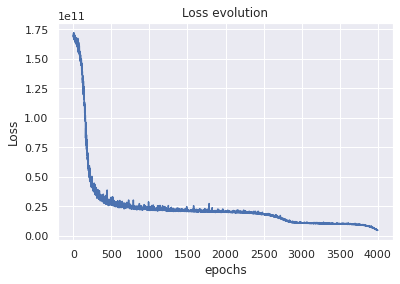

In [15]:
print_loss_function(VI_nlpca)

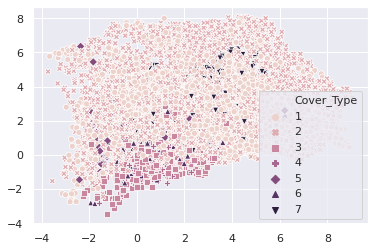

In [16]:
z = nlpca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

# Variational auto-encoder

In [21]:
vae_model = vae(hidden_space_dim, hidden_layer_dim, observed_space_dim)
q_vae = Q_vae(hidden_space_dim , hidden_layer_dim, observed_space_dim)

optimizer = tf.train.AdamOptimizer(learning_rate)
VI_vae = inf.inference.VI(q_vae, optimizer=optimizer, epochs=num_epochs)

In [22]:
vae_model.fit({"x": X}, VI_vae)


 0 epochs	 159794692096.0....................
 200 epochs	 7840079872.0....................
 400 epochs	 5532594688.0....................
 600 epochs	 4996874240.0....................
 800 epochs	 4777316352.0....................
 1000 epochs	 5083735552.0....................
 1200 epochs	 6724429824.0....................
 1400 epochs	 4185909760.0....................
 1600 epochs	 4033523456.0....................
 1800 epochs	 4847296512.0....................
 2000 epochs	 4306861568.0....................
 2200 epochs	 3886190848.0....................
 2400 epochs	 4185538816.0....................
 2600 epochs	 3636491264.0....................
 2800 epochs	 4134164224.0....................
 3000 epochs	 3343184128.0....................
 3200 epochs	 3169082624.0....................
 3400 epochs	 3052420352.0....................
 3600 epochs	 3445064192.0....................
 3800 epochs	 2413650944.0....................

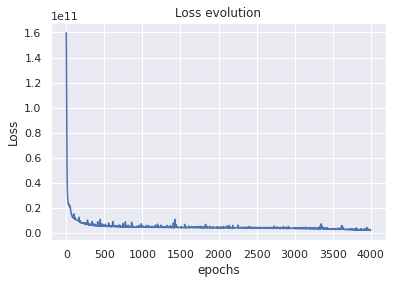

In [23]:
print_loss_function(VI_vae)

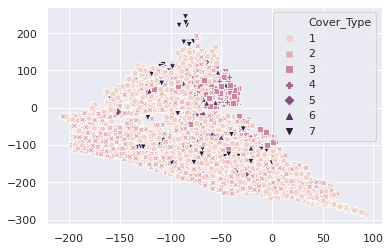

In [24]:
z = vae_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)